In [18]:
import calendar
import pandas as pd
import csv
import numpy as np
from scipy.stats import linregress
from matplotlib import pyplot as plt
import hvplot.pandas

wildfires_df = pd.read_csv("US_Lightning_Forest_Fires.csv")

In [19]:
del wildfires_df["STAT_CAUSE_DESCR"]
del wildfires_df["Unnamed: 0"]

In [20]:
wildfires_df.head()

,index,FIRE_YEAR,Fire_Date,DISCOVERY_TIME,Days_to_extinguish_fire,CONT_TIME,FIRE_SIZE,FIRE_SIZE_CLASS,LATITUDE,LONGITUDE,STATE,FIPS_CODE,FIPS_NAME
0,1,2004,05-12-2004,845.0,0.0,1530.0,0.25,A,38.933056,-120.404444,CA,61.0,Placer
1,3,2004,06-28-2004,1600.0,5.0,1400.0,0.10,A,38.559167,-119.913333,CA,3.0,Alpine
2,4,2004,06-28-2004,1600.0,5.0,1200.0,0.10,A,38.559167,-119.933056,CA,3.0,Alpine
3,5,2004,06-30-2004,1800.0,1.0,1600.0,0.10,A,38.635278,-120.103611,CA,5.0,Amador
4,6,2004,07-01-2004,1800.0,1.0,1400.0,0.10,A,38.688333,-120.153333,CA,17.0,El Dorado


In [21]:
south_dakota_df = wildfires_df.loc[(wildfires_df["STATE"] == "SD"), :]

In [22]:
county_count = south_dakota_df["FIPS_NAME"].value_counts()
county_name = county_count.index
county_occurences = county_count.values
x_axis = np.arange(len(county_name.unique()))
tick_locations = [value for value in x_axis]

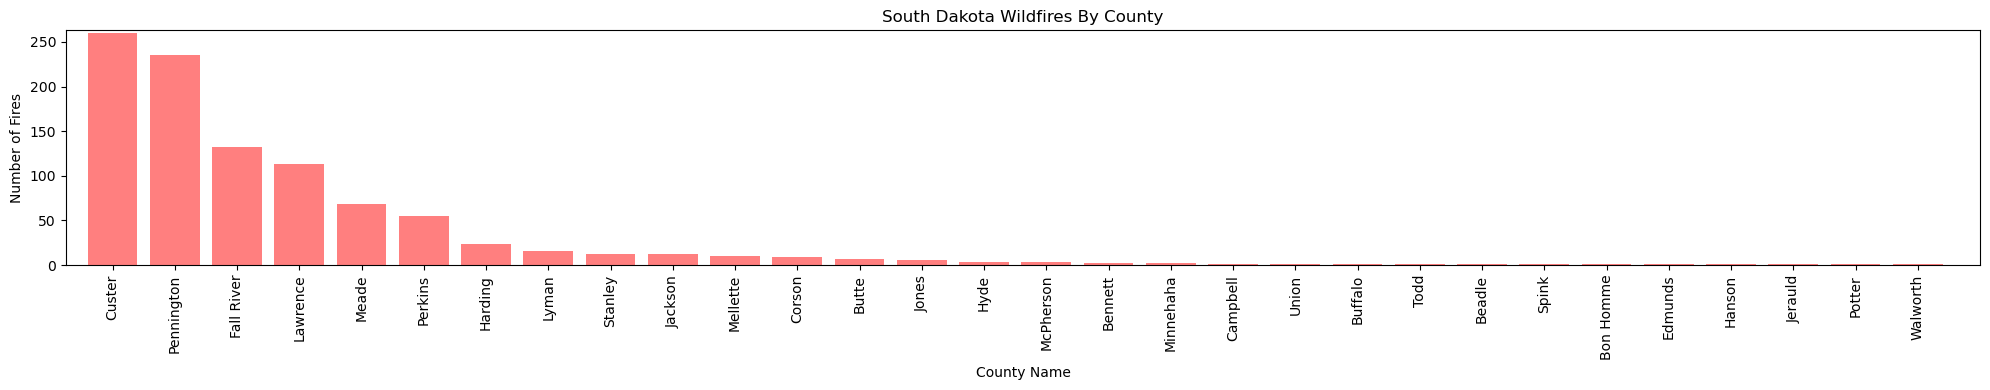

In [23]:
plt.figure(figsize=(20,4))
plt.bar(x_axis, county_occurences, color='r', alpha=0.5, align='center')
plt.xticks(tick_locations, county_name, rotation="vertical")
plt.xlim(-0.75, len(x_axis))
plt.ylim(0, max(county_occurences)+3)
plt.title("South Dakota Wildfires By County")
plt.xlabel("County Name")
plt.ylabel("Number of Fires")
plt.tight_layout()
plt.savefig("south_dakota_df.png")
plt.show()

In [24]:
south_dakota_county_df = south_dakota_df[["LATITUDE","LONGITUDE","FIPS_NAME","FIRE_YEAR","Fire_Date"]]

In [25]:
#coordinates = {
#    "year":south_dakota_df["FIRE_YEAR"],
#    "latitude":south_dakota_county_df["LATITUDE"],
#    "longitude":south_dakota_county_df["LONGITUDE"],
#    "County":south_dakota_county_df["FIPS_NAME"]
#}

In [26]:
#coordinates_df = pd.DataFrame(coordinates)
#for years in coordinates_df['year']:
#coordinates_df[coordinates_df['year'] == years]
#map_plot_1 = coordinates_df.hvplot.points(
        #"longitude",
        #"latitude",
        #geo = True,
        #tiles = "OSM",
        #frame_width = 900,
        #frame_height = 1440
#)
    #plt.savefig(f'map_{years}.png')

#map_plot_1

In [27]:
south_dakota_county_df['FIPS_NAME'] = south_dakota_county_df['FIPS_NAME'].fillna("No Name Given")
fire_count_year = south_dakota_county_df["FIRE_YEAR"].value_counts().sort_index()
year = fire_count_year.index.sort_values()
x_axis = np.arange(len(year.unique()))
tick_locations = [value for value in x_axis]

C:\Users\Jolto\AppData\Local\Temp\ipykernel_19212\1369851736.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  south_dakota_county_df['FIPS_NAME'] = south_dakota_county_df['FIPS_NAME'].fillna("No Name Given")


In [28]:
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_axis, fire_count_year)
regress_values = x_axis * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
p_value = "p = " + str(round(pvalue,8))

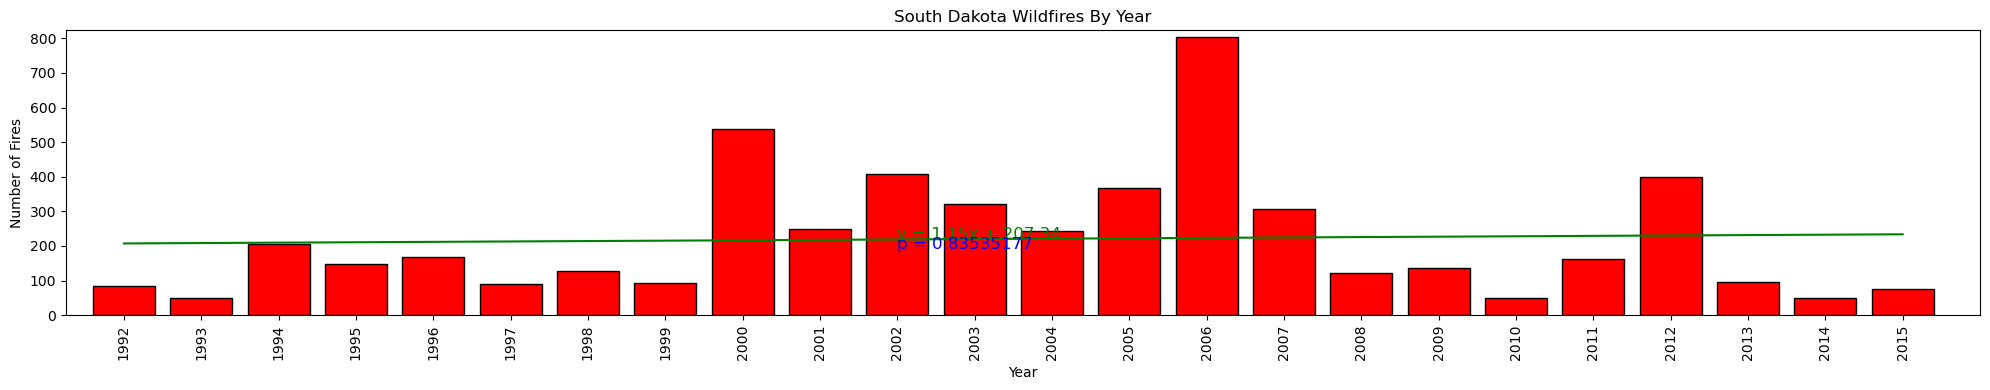

In [29]:
plt.figure(figsize=(20,4))
plt.bar(x_axis, fire_count_year, color='r', edgecolor='black')
plt.plot(x_axis, regress_values, "g-")
plt.text(10,220, line_eq, fontsize=12, color='green')
plt.text(10,190, p_value, fontsize=12, color='blue')
plt.xticks(tick_locations, year, rotation="vertical")
plt.xlim(-0.75, len(x_axis))
plt.ylim(0, max(fire_count_year)+20)
plt.title("South Dakota Wildfires By Year")
plt.xlabel("Year")
plt.ylabel("Number of Fires")
plt.tight_layout()
plt.savefig("south_dakota_year_fire.png")
plt.show()

In [30]:
south_dakota_date_df = south_dakota_county_df[['Fire_Date','FIPS_NAME']]
south_dakota_date_df['Fire_Date'] = pd.to_datetime(south_dakota_date_df['Fire_Date'], format='%m-%d-%Y')
south_dakota_date_df.head()

C:\Users\Jolto\AppData\Local\Temp\ipykernel_19212\241609361.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  south_dakota_date_df['Fire_Date'] = pd.to_datetime(south_dakota_date_df['Fire_Date'], format='%m-%d-%Y')


,Fire_Date,FIPS_NAME
47,2005-07-16,Pennington
48,2005-07-16,Pennington
155,2005-07-29,Custer
193,2005-07-31,Pennington
196,2005-06-02,Custer


In [31]:
south_dakota_date_df['month'] = south_dakota_date_df['Fire_Date'].dt.month
south_dakota_date_df['month'] = south_dakota_date_df['month'].apply(lambda x: calendar.month_name[x])
south_dakota_date_df.head()

C:\Users\Jolto\AppData\Local\Temp\ipykernel_19212\2052122067.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  south_dakota_date_df['month'] = south_dakota_date_df['Fire_Date'].dt.month
C:\Users\Jolto\AppData\Local\Temp\ipykernel_19212\2052122067.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  south_dakota_date_df['month'] = south_dakota_date_df['month'].apply(lambda x: calendar.month_name[x])


,Fire_Date,FIPS_NAME,month
47,2005-07-16,Pennington,July
48,2005-07-16,Pennington,July
155,2005-07-29,Custer,July
193,2005-07-31,Pennington,July
196,2005-06-02,Custer,June


In [32]:
months_categories = ["January", "February", "March", "April", "May", "June", "July", "August", "September", "October", "November", "December"]
south_dakota_date_df["month"] = pd.Categorical(south_dakota_date_df["month"], categories = months_categories)
south_dakota_date_df.sort_values(by = "month")

C:\Users\Jolto\AppData\Local\Temp\ipykernel_19212\361485303.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  south_dakota_date_df["month"] = pd.Categorical(south_dakota_date_df["month"], categories = months_categories)


,Fire_Date,FIPS_NAME,month
183592,2002-02-25,No Name Given,February
94775,1998-02-24,No Name Given,February
203193,1992-02-19,No Name Given,February
120314,2000-02-29,No Name Given,February
94565,1996-02-12,No Name Given,February
...,...,...,...
176228,2006-11-15,No Name Given,November
94709,1999-11-09,No Name Given,November
120244,2006-11-17,No Name Given,November
268254,2014-11-07,Harding,November


In [33]:
fire_count_month = south_dakota_date_df["month"].value_counts().sort_index()
month = fire_count_month.index.sort_values()
x_axis = np.arange(len(month.unique()))
tick_locations = [value for value in x_axis]

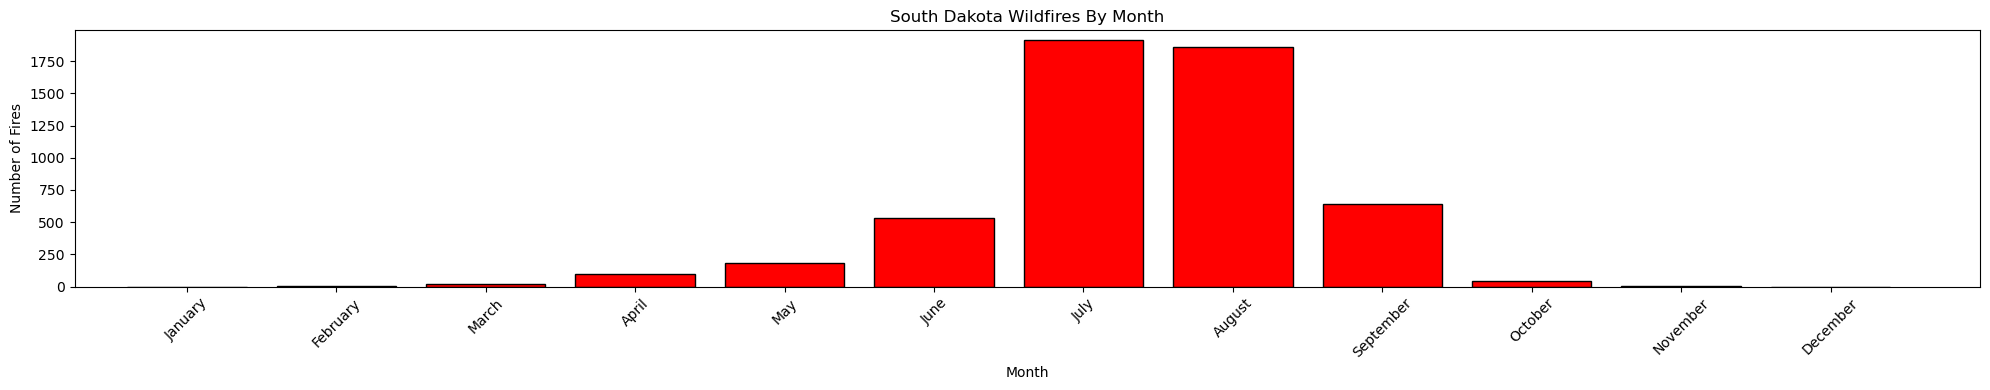

In [34]:
plt.figure(figsize=(20,4))
plt.bar(x_axis, fire_count_month, color='red', edgecolor='black')
plt.xticks(tick_locations, month, rotation=45)
plt.xlim(-0.75, len(x_axis))
plt.ylim(0, max(fire_count_month)+75)
plt.title("South Dakota Wildfires By Month")
plt.xlabel("Month")
plt.ylabel("Number of Fires")
plt.tight_layout()
plt.savefig("south_dakota_month_fire.png")
plt.show()